In [324]:
import pandas as pd

# Data Exploration & Cleaning (Week 1)

In [325]:
data = pd.read_csv("/Users/rajatthakur/Desktop/SuperDataScienceML/CollaborationProjects/SDS-CP010-tech-companies-analysis/data/tech-companies.csv")

In [326]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,$2.866 T,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,$2.755 T,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,$1.186 T,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,$495.95 B,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,$487.64 B,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",$825.4 M,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",$819.5 M,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,$819.3 M,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,$816.1 M,300552,China,Technology,Scientific & Technical Instruments


In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ranking     1000 non-null   int64 
 1   Company     1000 non-null   object
 2   Market Cap  1000 non-null   object
 3   Stock       1000 non-null   object
 4   Country     1000 non-null   object
 5   Sector      1000 non-null   object
 6   Industry    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


# Summary Statistics:

In [328]:
#Transformation of Market Cap to Numeric data to understand Marktet Cap Statistics
for i, marketCap in enumerate(data['Market Cap']):
    marketCap = marketCap.replace('$', '')
    
    if 'T' in marketCap:
        marketCap = float(marketCap.replace('T', '')) * 1e12
    elif 'B' in marketCap:
        marketCap = float(marketCap.replace('B', '')) * 1e9
    elif 'M' in marketCap:
        marketCap = float(marketCap.replace('M', '')) * 1e6
    else:
        marketCap = float(marketCap) 
    
    data['Market Cap'][i] = marketCap


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_48402/547994546.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [329]:
data

,Ranking,Company,Market Cap,Stock,Country,Sector,Industry
0,1,Apple Inc.,2866000000000.0,AAPL,United States,Technology,Consumer Electronics
1,2,Microsoft Corporation,2755000000000.0,MSFT,United States,Technology,Software—Infrastructure
2,3,Nvidia Corporation,1186000000000.0,NVDA,United States,Technology,Semiconductors
3,4,Broadcom Inc.,495950000000.0,AVGO,United States,Technology,Semiconductors
4,5,Taiwan Semiconductor Manufacturing Company Lim...,487640000000.0,2330,Taiwan,Technology,Semiconductors
...,...,...,...,...,...,...,...
995,996,"Henan Thinker Automatic Equipment Co.,Ltd.",825400000.0,603508,China,Technology,Scientific & Technical Instruments
996,997,"transcosmos, Inc.",819500000.0,9715,Japan,Technology,Information Technology Services
997,998,Yeahka Ltd,819300000.0,9923,China,Technology,Software—Infrastructure
998,999,Beijing Wanji Technology Co. Ltd,816100000.0,300552,China,Technology,Scientific & Technical Instruments


In [330]:
pip install numerize 

Note: you may need to restart the kernel to use updated packages.


In [331]:
from numerize import numerize 


In [332]:
averageMarketCap = numerize.numerize(data['Market Cap'].mean())
print('Average Market Cap of Top 1000 Companies: ',averageMarketCap)


Average Market Cap of Top 1000 Companies:  18.76B


In [333]:
marketCapVariation = numerize.numerize(data['Market Cap'].std())
print('Standard Deviation(Market Cap Variation): ', marketCapVariation)

Standard Deviation(Market Cap Variation):  135.73B


In [334]:
medianMarketCap = numerize.numerize(data['Market Cap'].median())
print('Meidan Market Cap: ', medianMarketCap)

Meidan Market Cap:  2.74B


In [335]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


# Top Ten Companies according to their market cap

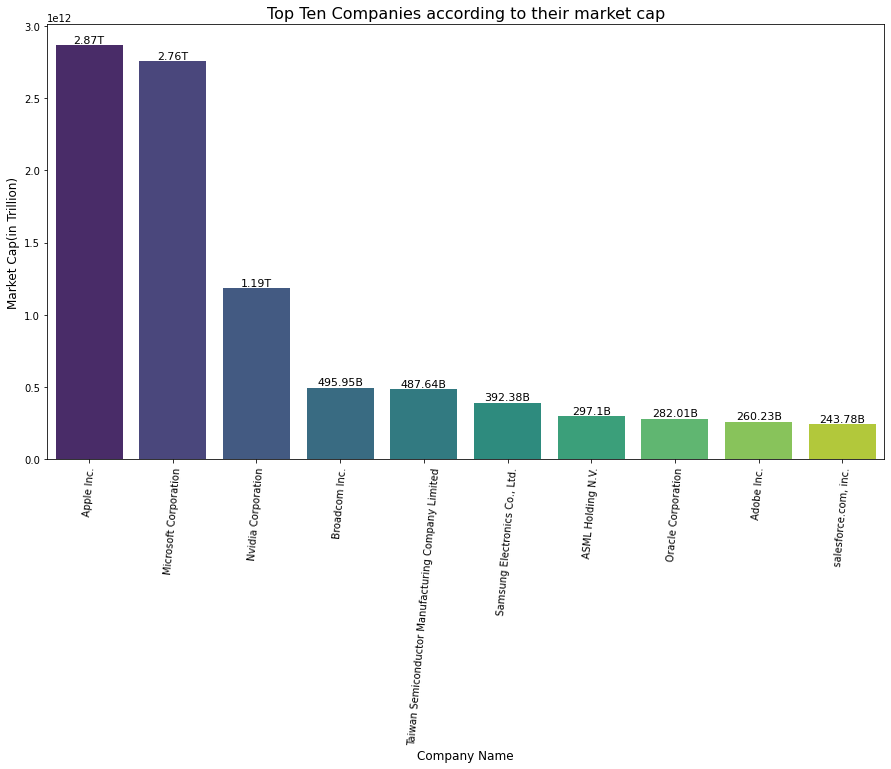

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

marketCap = topTenCompanies['Market Cap']

plt.figure(figsize=(15, 8))

ax = sns.barplot(x=topTenCompanies['Company'], y= marketCap, palette='viridis')
numerized_values = [numerize.numerize(val) for val in marketCap]
for i, val in enumerate(numerized_values):
    ax.text(i, marketCap[i], val, ha='center', va='bottom', fontsize=11, color='black')


plt.title('Top Ten Companies according to their market cap', fontsize=16)

plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Market Cap(in Trillion)', fontsize=12)
plt.xticks(rotation=85)
plt.show()

In [337]:
totalCountries = data['Country'].unique().size
print(totalCountries ,'countries are represented by the companies there.')

38 countries are represented by the companies there.


In [338]:
totalIndustries = data['Industry'].unique().size
print('Total number of Industries: ', totalIndustries)

Total number of Industries:  12


In [339]:
industriesSector = data['Sector'].unique()
print('All the industries belongs to', industriesSector, 'sector')

All the industries belongs to ['Technology'] sector


# Regional Market Analysis by Market Cap

In [340]:
import plotly.express as px

country_grouped = data.groupby('Country')['Market Cap'].sum().reset_index()

country_grouped['Market Cap'] = country_grouped['Market Cap'].apply(numerize.numerize)
fig = px.choropleth(country_grouped, locations='Country', locationmode='country names',
                    color='Market Cap', hover_name='Country', 
                    color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(title='Market Cap by Country', title_x=0.5)
fig.show()

# Industries per Country with Market Cap

<Figure size 1080x360 with 0 Axes>

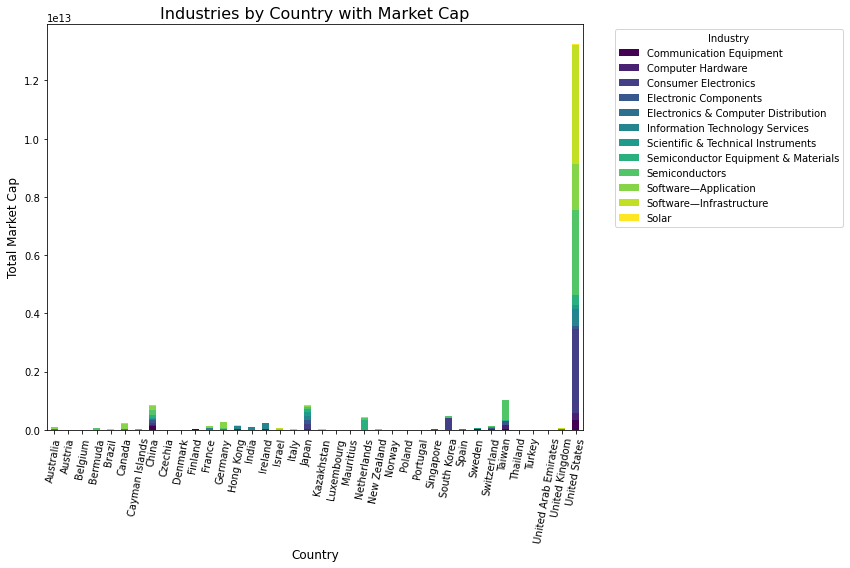

In [361]:
country_grouped = data.groupby(['Country', 'Industry'])['Market Cap'].sum().unstack()


plt.figure(figsize=(15, 5))
country_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Industries by Country with Market Cap', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Market Cap', fontsize=12)
plt.xticks(rotation=80)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [393]:

pivot_table = data.pivot_table(values='Market Cap', index='Industry', columns='Country', aggfunc='sum',  margins=True)
pivot_table = pivot_table.applymap(lambda x: numerize.numerize(x) if x > 0 else '0')
pivot_table.index = pivot_table.index.map(lambda x: 'Total' if x == 'All' else x)
pivot_table = pivot_table.fillna(0)

display(pivot_table)


Country,Australia,Austria,Belgium,Bermuda,Brazil,Canada,Cayman Islands,China,Czechia,Denmark,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States,All
Industry,,,,,,,,,,,,,,,,,,,,,
Communication Equipment,0,0,0,0,1.41B,1.19B,0,146.84B,0,0,...,0,24.09B,1.46B,13.61B,0,0,0,0,345.63B,560.24B
Computer Hardware,0,1.16B,0,0,0,0,0,24.41B,0,0,...,0,0,14.57B,138.99B,0,0,0,0,224.1B,471.51B
Consumer Electronics,0,0,0,0,1.38B,0,0,69.64B,0,0,...,0,2.8B,0,946.9M,0,3.53B,0,0,2.88T,3.54T
Electronic Components,921M,1.07B,1.57B,0,0,3.35B,6.7B,110.05B,0,0,...,0,4.15B,42.62B,152.99B,3.08B,0,0,956.2M,121.26B,588.64B
Electronics & Computer Distribution,1.42B,0,0,0,0,0,0,909.1M,0,0,...,0,0,0,4.45B,1.79B,0,0,0,13.31B,32.04B
Information Technology Services,15.73B,0,1.19B,6.18B,2.71B,27.46B,0,36.26B,0,1.62B,...,33.87B,3.88B,4.54B,973.7M,0,0,2.65B,7.52B,560.98B,1.36T
Scientific & Technical Instruments,1.01B,0,0,0,0,0,0,26.58B,0,968.3M,...,0,32.17B,30.9B,2.98B,0,0,0,8.21B,131.97B,382.55B
Semiconductor Equipment & Materials,0,0,0,0,0,0,0,101.78B,0,0,...,0,0,0,20.53B,0,0,0,1.69B,367.97B,965.52B
Semiconductors,0,0,5.12B,50.2B,0,0,6.18B,157.73B,0,0,...,0,0,40.87B,692.25B,0,0,0,1.08B,2.9T,4.1T


# MarketCap percentage per Industry

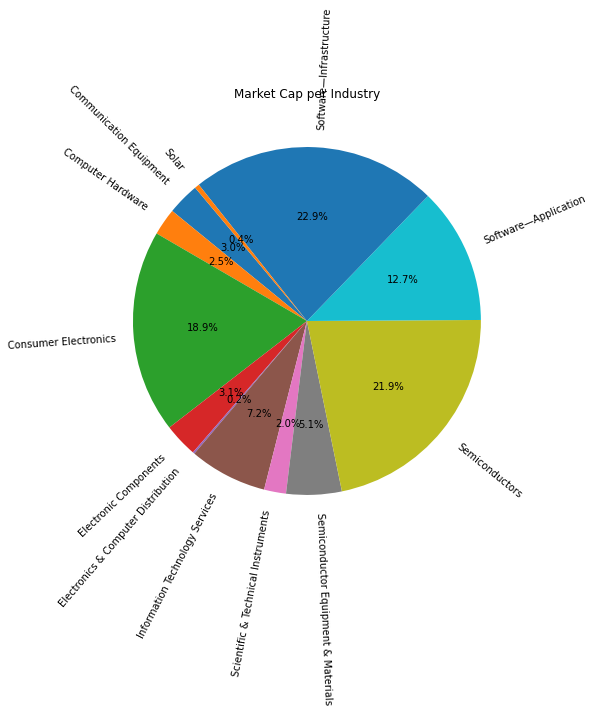

In [415]:
industry_market_cap = data.groupby('Industry')['Market Cap'].sum()


plt.figure(figsize=(8, 8))
plt.pie(industry_market_cap, labels=industry_market_cap.index, autopct='%1.1f%%', startangle=130, rotatelabels=True)


plt.title('Market Cap per Industry')
plt.show()

# Testing scenarios 